# Megan's Finances

If you want to run this notebook see the README.

## Problem Statement

- Periodic income
- Periodic expenses
- One-off expenses (goals)
- Periodicity can be days, months, year
- Assume solvent

## Questions
1. How do we pay for everything?
2. How do we provide a constant discrecenary income?

## Solving a simpler problem first....
---

I can see that this problem is fairly large so I'll break it down and go from there.

I can see that discovering the periodicity of income/expenses is important because as soon as I've solved one cycle I've solved the problem. However:
- Cycles will be the LCD of transaction periodicity
- Cycle could be really long
- Monthly payments are not actually periodic by month (aka variable days in between)
- Non-periodic transactions throw this all off

I'll make a few assumptions for my first go
- All transactions are periodic on a day schedule (ex every 5 days)
- Solvency is assumed
- Constant daily discretionary income rate
- The base time unit is a day

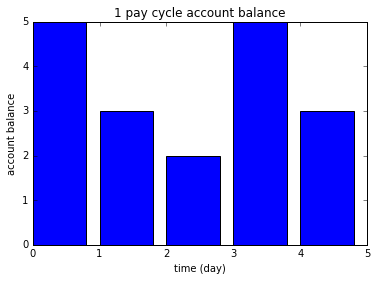

In [292]:
# Pick an example payment/expense cycle
#  - Negative numbers are expenses
#  - 1 transaction per day for simplicity (can assume transactions grouped by day)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pay_cycle = [5, -2, -1, 3, -2] # 5 day example cycle
account_balance = np.cumsum(pay_cycle)

plt.plot()
plt.bar(range(0,len(account_balance)), account_balance)
plt.xlabel('time (day)')
plt.ylabel('account balance')
plt.title('1 pay cycle account balance')

### Can we pay all expenses?
Yes because there is a positive balance at the end

This strategy was to simply hold onto all the money

In [293]:
print 'end of 1 cycle account balance is',  account_balance[-1]

end of 1 cycle account balance is 3


### How much discretionary money can we allow?

- Per cycle we can give 3 because that is how much we end with
- Discrecenary funds are per day so divide 3 over whole cycle

In [294]:
funds_per_day = account_balance[-1] * 1.0 / len(account_balance)
print 'funds_per_day', funds_per_day

funds_per_day 0.6


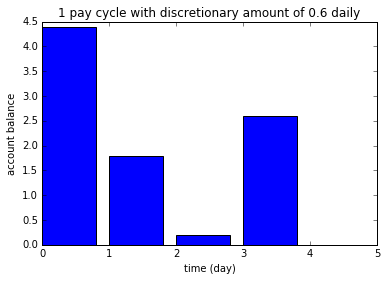

In [295]:
pay_cycle_with_discretionary = pay_cycle - funds_per_day
account_balance_with_discretionary = np.cumsum(pay_cycle_with_discretionary)

plt.bar(range(0,len(account_balance_with_discretionary)), account_balance_with_discretionary)
plt.xlabel('time (day)')
plt.ylabel('account balance')
plt.title('1 pay cycle with discretionary amount of ' + str(funds_per_day) + ' daily')

This looks fine except that what happens if we give-up too much money mid cycle and cannot meet a payment?

balance_over_payout [5 3 1 5 3]
funds_per_day 0.6
balance_over_payout_with_discretionary [ 4.4  1.8 -0.8  2.6  0. ]


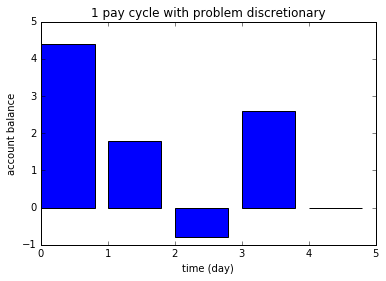

In [296]:
# Uh oh pay cycle where we still end with positive balance of 3
pay_cycle_over_payout = [5, -2, -2, 4, -2]
balance_over_payout = np.cumsum(pay_cycle_over_payout)
print 'balance_over_payout', balance_over_payout

# However now we are in trouble if we use the end balance
funds_per_day = balance_over_payout[-1] * 1.0 / len(balance_over_payout)
balance_over_payout_with_discretionary = np.cumsum(pay_cycle_over_payout - funds_per_day)
print 'funds_per_day', funds_per_day
print 'balance_over_payout_with_discretionary', balance_over_payout_with_discretionary

plt.bar(range(0,len(balance_over_payout_with_discretionary)), balance_over_payout_with_discretionary)
plt.xlabel('time (day)')
plt.ylabel('account balance')
plt.title('1 pay cycle with problem discretionary')

We need to adjust our strategy from before.

- Need to save enough for every payment
- We can calculate daily payout rate for each balance
- Minimum payout rate is what we can afford

pay_out_rates [ 5.          1.5         0.33333333  1.25        0.6       ]
min pay_out_rates 0.333333333333
balance_over_payout_with_discretionary [ 4.66666667  2.33333333  0.          3.66666667  1.33333333]


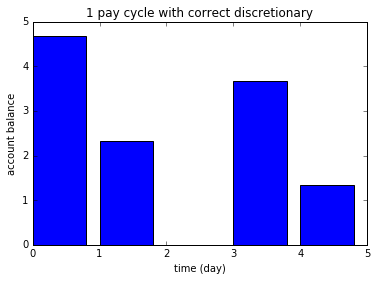

In [297]:
# Divide each balance by the number of days up to and including
pay_out_rates =  
print 'pay_out_rates', pay_out_rates
print 'min pay_out_rates', min(pay_out_rates)
balance_over_payout_with_discretionary = np.cumsum(pay_cycle_over_payout - min(pay_out_rates))
print 'balance_over_payout_with_discretionary', balance_over_payout_with_discretionary

plt.bar(range(0,len(balance_over_payout_with_discretionary)), balance_over_payout_with_discretionary)
plt.xlabel('time (day)')
plt.ylabel('account balance')
plt.title('1 pay cycle with correct discretionary')

We can add further cycles and the balance (in this case) will continue to grow but discretionary spending will stay constant

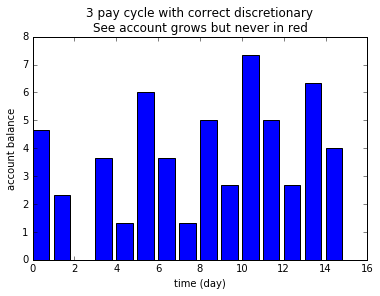

In [298]:
def max_discretionary_rate(pay_cycles):
    balance = np.cumsum(pay_cycles)
    return min(balance * 1.0 / range(1,len(balance)+1))

pay_cycles = [5, -2, -2, 4, -2] * 3
balance = np.cumsum(pay_cycles - max_discretionary_rate(pay_cycles))
plt.bar(range(0,len(balance)), balance)
plt.xlabel('time (day)')
plt.ylabel('account balance')
plt.title('3 pay cycle with correct discretionary\nSee account grows but never in red')

Final note....
- Assumed worst case where we started with an empty balance
- Had the balance started with enough to cover the low point then we could dole out more
- With starting balance we can maintain stationairy balance over time

The below assums we start with a balance of .8 (the minimum necessary) to meet the first low point...

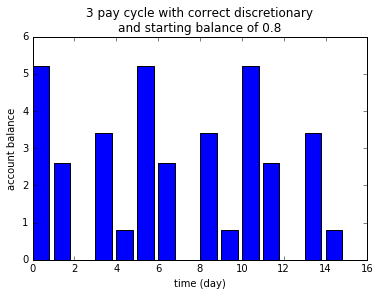

In [299]:
pay_cycles = [5, -2, -2, 4, -2] * 3
starting = 0.8
pay_cycles[0] += starting
balance_with_started = np.cumsum(np.array(pay_cycles) - max_discretionary_rate(pay_cycles))
plt.bar(range(0,len(balance_with_started)), balance_with_started)
plt.xlabel('time (day)')
plt.ylabel('account balance')
plt.title('3 pay cycle with correct discretionary\nand starting balance of ' + str(starting))

### Summary
- Given periodic transactions...
- Calculate payments over a period
- Can make all payments if balance is never negative
- Fixed discretionary income based on lowest payout rate of the cycle
- The remaining balance at the end of the cycle could be saved or provided directly to the customer
- If we have a large enough starting balance we can just dole out enough money so that the balance does not increase per cycle

## Pay cycle periods

In [300]:
# Given transactions with periods, cycle period is the least common denominator

def lcm(lst):
    if len(lst) == 1: return lst[0]
    return lcm_helper(lst[0], lcm(lst[1:]))

def lcm_helper(a,b):
    return a*b / gcd(a,b)

def gcd(a,b):
    """Uses Euclid's algo (https://en.wikipedia.org/wiki/Euclidean_algorithm)"""
    while b != 0:
       temp = b
       b = a % b
       a = temp
    return a

# Quick tests
assert(lcm([0]) == 0)
assert(lcm([2,3,3,2,4]) == 12)

Example of least common multiple 210
Min, max, peak-to-peak balance -1.86666666667 3.71904761905 5.58571428571


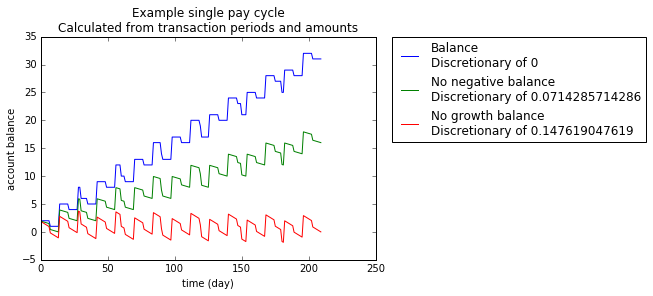

In [301]:
# Example
periods = [14,7,30]
transactions = [5, -1, -2] # paycheck every 14 days, expenses every 7th and 30th
print 'Example of least common multiple', lcm(periods)

# Look at the pay cycle
def add_periodically(indx, transactions, periods):
    transaction_sum = 0
    for i, p in enumerate(periods):
        if indx % p == 0:
            transaction_sum += transactions[i]
    return transaction_sum

def create_pay_cycle(transactions, periods):
    period = lcm(periods)
    paymets_over_cycle = [add_periodically(i, transactions, periods) for i in xrange(0,period)]
    return paymets_over_cycle
    
# Example of calculating balance based on 
pay_cycle = create_pay_cycle(transactions, periods)
balance = np.cumsum(pay_cycle)
plt.plot(range(0,len(balance)), balance, label='Balance\nDiscretionary of 0')
plt.xlabel('time (day)')
plt.ylabel('account balance')
plt.title('Example single pay cycle\nCalculated from transaction periods and amounts')

# No going in the red discretionary
discretionary = max_discretionary_rate(pay_cycle)
balance = np.cumsum(pay_cycle - discretionary)
plt.plot(range(0,len(balance)), balance, label='No negative balance \nDiscretionary of ' + str(discretionary))

# No-growth discretionary
balance = np.cumsum(pay_cycle)
discretionary = balance[-1] * 1.0 / len(balance)
balance = np.cumsum(pay_cycle - discretionary)
plt.plot(range(0,len(balance)), balance, label='No growth balance\nDiscretionary of ' + str(discretionary))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Quick look at min/max balance with discretionary
print 'Min, max, peak-to-peak balance', min(balance), max(balance), max(balance) - min(balance)

# Adding complexity
---

There are a few more factors to explore
- Determinging 'periodicity'
    - Irregular 'periodicity'
    - Computing 'far enough' out to know that expenses will be met
- One-off payments (goals)

### One-off payments

From the problem statement... "She also has a number of goals."
1. She wants to save up \$500 to visit her family on September 3
1. She wants \$100 for horse riding lessons each week
1. needs \$200 for groceries every month
1. sends money home to her father every other month on the 5th for her health insurance.

The last 3 of these are periodic expenses and can be treated like the periodic expenses that I discussed before.

The first item is tough because it is not periodic.

A few observations
- I will not be able to have a constant discretionary over all time
- Once the one-off payment is complete there will be more available \$
- One-off payments can be fulfilled however quickly or slowly as possible within the deadline
- Fulfillment cannot occur at a rate faster than the discretionary fund rate or the balance could go red

Since I break the constant discretionary rate assumption I'll just assume that goals are fulfilled from discretionary funds.

In [302]:
# Example with a one-off payment/goal
pay_cycle = [5, 4, 3, 0, -8]
discretionary_rate = max_discretionary_rate(pay_cycle) # Know that won't go red in first cycle
one_off_payment = 15
deadline = 25 # days

print 'Fastest time to meet one-off payment is', np.ceil(one_off_payment / discretionary_rate), 'days'
print 'Set aside daily', one_off_payment * 1.0 / deadline, 'to meet payment of', one_off_payment,
print 'in', deadline, 'days, leaving', discretionary_rate - one_off_payment * 1.0 / deadline, 'for discretionary spending'

Fastest time to meet one-off payment is 19.0 days
Set aside daily 0.6 to meet payment of 15 in 25 days, leaving 0.2 for discretionary spending


In [331]:
# If I add the single payment/goal to a pay cycle then
#  I can recalculate the discretionary rate for that specific cycle
#  but the discretionary rate will most likely need to change again
#  once the goal is met since the account will now be growing again

# Example:
pay_cycle = np.array([5.0, 4.0, 3.0, 0.0, -8.0])
one_off_payment = -2.0
deadline = 3
pay_cycle_modified = np.copy(pay_cycle)
pay_cycle_modified[:deadline] += one_off_payment / deadline
print 'pay_cycle', pay_cycle_modified
print 'balance', np.cumsum(pay_cycle_modified)
print 'discretionary rate without one-off payment', max_discretionary_rate(pay_cycle)
print 'discretionary rate with one-off payment', max_discretionary_rate(pay_cycle_modified)

pay_cycle [ 4.33333333  3.33333333  2.33333333  0.         -8.        ]
balance [  4.33333333   7.66666667  10.          10.           2.        ]
discretionary rate without one-off payment 0.8
discretionary rate with one-off payment 0.4


## Dealing with periodicity

There are lots of types of 'periodicity' in finance. I'll try to cover

- Every x days (biweekly, etc)
- Annual
- Monthy (15th of month, etc)

**Goal:** Convert every period to days so that I can calculate the LCM pay cycle period

**Every x days** This case is already converted to a period in days.

### Annual

- 365 days
- Leap year 366, every 4 years
- Perod is $356*3 + 366 = 1461$ days 

### Monthly

- 28, 29 (leap year), 30 or 31 days in duration
- Given leap year factor also takes 4 years or 1461 days to repeat

In [303]:
# Find prime factors -- 1461 will probably result in very large pay cycles
print 1461/3.0 # 487 is prime :/

 # Monthy and biweekly -- this pay period is unrealisitcally long
print lcm([1461, 14]) / 365, 'years'

487.0
56 years


### Summay on Periods

- 4 years will be a common period
- Pay cycle periodicity can become long but at least solving all the way out allows me to solve for all time
- Solving for all time allows me to meet the fixed discretionary rate requirement

## Complex Example

Taking in all the learning from above

In [304]:
# Ok so I've figured out how to make things periodic
#  I'll give an example with lots of different transaction periods
#  but no one-off payments/goals

# Day based periods
income1 = 90
income1_period = 14 # biweekly
food_costs = -5
food_costs_period = 1 # daily expense

# Monthly periods
income2 = 100
income2_day_of_month = 1
rent = -90
rent_day_of_month = 25

# Annual
taxes = -100
taxes_day_of_year = 70

# Monthly and annual transactions use this period
days_in_4_years = 1461

In [305]:
# Calc pay cycle
#  Use 1461 for annual and monthly payments
pay_cycle_period = lcm([days_in_4_years, income1_period, food_costs_period])
print 'pay_cycle_period', pay_cycle_period, 'days (', pay_cycle_period/365, 'years)'

pay_cycle_period 20454 days ( 56 years)


In [306]:
# Calculate pay cycle
#  - Everything starts on day 0
#  - No discretionary
times_repeat_daily = pay_cycle_period / lcm([income1_period, food_costs_period])
pay_cycle_day_based = create_pay_cycle([income1, food_costs], [income1_period, food_costs_period])
pay_cycle_day_based = times_repeat_daily * pay_cycle_day_based

# Sanity check
print pay_cycle_day_based[:10]

[85, -5, -5, -5, -5, -5, -5, -5, -5, -5]


In [307]:
# Calculate monthly, leap year is the last year
month_lengths = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31] * 3 + [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
days_passed_in_4_years = np.insert(np.cumsum(month_lengths), 0, 0)

# Add income2
income_days = np.array([income2_day_of_month + days for days in days_passed_in_4_years[:-1]])
income2_cycle = np.zeros(days_in_4_years)
income2_cycle[income_days - 1] = income2 # days index starts at 1 not 0

# Add rent
rent_days = np.array([rent_day_of_month + days for days in days_passed_in_4_years[:-1]])
rent_cycle = np.zeros(days_in_4_years)
rent_cycle[rent_days - 1] = rent 

# Combine all monthly
pay_cycle_month_based = income2_cycle + rent_cycle
times_repeat_monthly = pay_cycle_period / days_in_4_years
pay_cycle_month_based = np.tile(pay_cycle_month_based, times_repeat_monthly)

# Sanity check
print pay_cycle_month_based[:32]

[ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  -90.    0.    0.    0.    0.    0.    0.  100.]


In [308]:
# Calculate annual, leap year is the last year
times_repeat_annual = pay_cycle_period / days_in_4_years
pay_cycle_year_based = np.zeros(days_in_4_years)
tax_days = np.array([taxes_day_of_year + i*365 for i in xrange(0,4)])
pay_cycle_year_based[tax_days - 1] = taxes
pay_cycle_year_based = np.tile(pay_cycle_year_based, times_repeat_annual)

# Sanity check
print sum(pay_cycle_year_based[:365])

-100.0


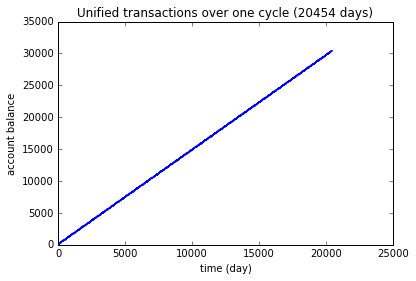

In [309]:
# Combine all pay cycles
pay_cycle = pay_cycle_day_based + pay_cycle_month_based + pay_cycle_year_based
balance = np.cumsum(pay_cycle)

# Plot
plt.plot(range(0,len(balance)), balance)
plt.xlabel('time (day)')
plt.ylabel('account balance')
plt.title('Unified transactions over one cycle (' + str(len(balance)) + ' days)')

daily discretionary amount assuming no starting balance 147.741935484
choosen daily discretionary amount with minimum starting balance 1.48332844431


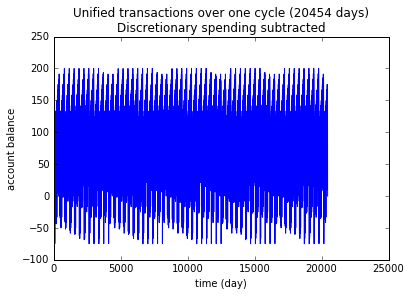

In [310]:
# Add in discretionary spending
#  Note assume will have a starting balance to meet first low point
discretionary_daily = balance[-1] * 1.0 / len(balance)
print 'daily discretionary amount assuming no starting balance', max_discretionary_rate(balance)
print 'choosen daily discretionary amount with minimum starting balance', discretionary_daily
balance_minus_discretionary = np.cumsum(pay_cycle - discretionary_daily)

# Plot
plt.plot(range(0,len(balance_minus_discretionary)), balance_minus_discretionary)
plt.xlabel('time (day)')
plt.ylabel('account balance')
plt.title('Unified transactions over one cycle (' + str(len(balance_minus_discretionary)) + ' days)\nDiscretionary spending subtracted')

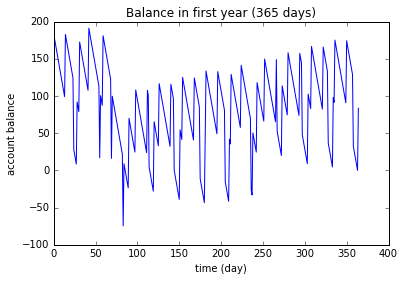

In [315]:
# Zoom on first year
first_year = balance_minus_discretionary[:365]
plt.plot(range(0,len(first_year)), first_year)
plt.xlabel('time (day)')
plt.ylabel('account balance')
plt.title('Balance in first year (' + str(len(first_year)) + ' days)')

In [312]:
# Stats about the balance fluctuations
print 'Balance stats'
print 'Min', min(balance_minus_discretionary)
print 'Max', max(balance_minus_discretionary)
print 'Rng', max(balance_minus_discretionary) - min(balance_minus_discretionary)
print 'Avg', np.mean(balance_minus_discretionary)
print 'Std', np.std(balance_minus_discretionary)

Balance stats
Min -74.9418206708
Max 200.313386135
Rng 275.255206806
Avg 86.8644274958
Std 54.9941294649


### Summary

While the above analysis will come-up with a payment schedule there are a few caveats
- Sometimes a starting balance is necessary to avoid going red if a discretionary rate is choosen to keep the account stable
- A constant discretionary rate requires solving out for the whole period (in this case 56 years)

The second point is the trickiest. In 56 years who knows where this acocunt will be. However to perfectly solve this problem we need to have a constant discretionary rate which requires knowing information for all time. Conveniently given periodic info we only need to know about one period.

Since the account payments plan will likely change over time these calculations should be redone and a new discretionary rate calculated with each payment plan change.

# Final experiment

One last tought is to try to solve for the discretionary rate without calculating out for a whole period. This plot serves as inspiration:

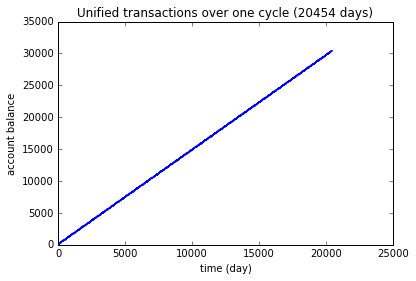

In [313]:
# Plot from final example
plt.plot(range(0,len(balance)), balance)
plt.xlabel('time (day)')
plt.ylabel('account balance')
plt.title('Unified transactions over one cycle (' + str(len(balance)) + ' days)')

The basic idea is that the balance becomes fairly linear over time aka the slope is constant...

The slope of the balance is determined by payments and the discretionary rate (in the best case) is just the average of the payments over the pay cycle.

When does the average of the payments get close enough to approximate the discretionary rate?

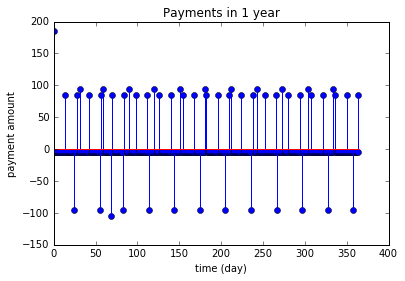

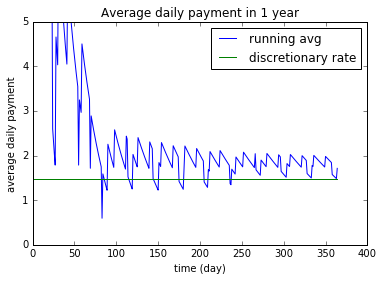

In [314]:
# Plot the payments
annual_payments = pay_cycle[0:365]
ind = range(0,len(annual_payments))
plt.stem(ind, annual_payments)
plt.xlabel('time (day)')
plt.ylabel('payment amount')
plt.title('Payments in 1 year')

# Running average
running_avg = np.cumsum(annual_payments) / range(1,len(annual_payments)+1)
plt.figure()
plt.plot(ind, running_avg, label='running avg')
plt.plot(ind, [balance[-1]*1.0/len(balance)] * len(ind), label='discretionary rate')
plt.legend()
plt.ylim([0,5])
plt.xlabel('time (day)')
plt.ylabel('average daily payment')
plt.title('Average daily payment in 1 year')

This approach looks appealing and probably works in normal cases where payments are all around the same size; however outlier payments will throw this approach into disarray thus forcing the computation of the complete payments cycle

# Final Thoughts

You've made it :) Lots of brain dumping above...

Conclusion
- Possible to schedule and have a fixed discretionary rate
- A starting balance enables a stationay account balance over time but isn't always necessary
- One-off payments break the ability to do fixed discretionary rate over all time
- Adding new payments requires recompuation of the pay cycle
- Pay cyclce can become long and can be calculated with only periodic payments

## Future explorations

- Loosening constraint on discretionary income
    - Maximal earliest discretionary payments
    - Periodic discretionary payments (annual?)
- Defining common payments scenarios to allow for discretionary rate prediction
- Loose periodicity (pay around 15th of month)
    - Look at pay cycle rankings